In [16]:
import gymnasium as gym
import torch
import matplotlib.pyplot as plt
env = gym.make('CartPole-v1')
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

In [12]:
def run_episode(env,weight):
    state,info = env.reset()
    grads = []
    total_reward = 0
    is_done = False
    truncated = False
    while (not is_done) and (not truncated):
        state = torch.from_numpy(state).float()
        z = torch.matmul(state,weight)
        probs = torch.nn.Softmax()(z)
        action = int(torch.bernoulli(probs[1]).item())
        d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
        d_log = d_softmax[action] / probs[action]
        grad = state.view(-1,1)*d_log
        grads.append(grad)
        state,reward,is_done,truncated,info = env.step(action)
        total_reward += reward 
        if is_done or truncated:
            break
    return total_reward, grads

In [13]:
n_episode = 1000
weight = torch.rand(n_state,n_action)
total_rewards = []
learning_rate = 0.001


In [17]:
for episode in range(n_episode):
    total_reward, gradients = run_episode(env,weight)
    print('Episode {}: {}'.format(episode + 1, total_reward))
    for i, gradient in enumerate(gradients):
        weight += learning_rate * gradient * (total_reward-i)
    total_rewards.append(total_reward)
    

/tmp/ipykernel_1274/673883299.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.Softmax()(z)


Episode 1: 500.0
Episode 2: 500.0
Episode 3: 500.0
Episode 4: 500.0
Episode 5: 500.0
Episode 6: 500.0
Episode 7: 500.0
Episode 8: 500.0
Episode 9: 500.0
Episode 10: 500.0
Episode 11: 500.0
Episode 12: 500.0
Episode 13: 500.0
Episode 14: 500.0
Episode 15: 500.0
Episode 16: 500.0
Episode 17: 500.0
Episode 18: 500.0
Episode 19: 500.0
Episode 20: 500.0
Episode 21: 500.0
Episode 22: 500.0
Episode 23: 500.0
Episode 24: 500.0
Episode 25: 500.0
Episode 26: 500.0
Episode 27: 500.0
Episode 28: 500.0
Episode 29: 500.0
Episode 30: 500.0
Episode 31: 500.0
Episode 32: 500.0
Episode 33: 500.0
Episode 34: 500.0
Episode 35: 500.0
Episode 36: 500.0
Episode 37: 500.0
Episode 38: 500.0
Episode 39: 500.0
Episode 40: 500.0
Episode 41: 500.0
Episode 42: 500.0
Episode 43: 500.0
Episode 44: 500.0
Episode 45: 500.0
Episode 46: 500.0
Episode 47: 500.0
Episode 48: 500.0
Episode 49: 500.0
Episode 50: 500.0
Episode 51: 500.0
Episode 52: 500.0
Episode 53: 500.0
Episode 54: 500.0
Episode 55: 500.0
Episode 56: 500.0
E

Episode 443: 500.0
Episode 444: 500.0
Episode 445: 500.0
Episode 446: 500.0
Episode 447: 500.0
Episode 448: 500.0
Episode 449: 500.0
Episode 450: 500.0
Episode 451: 500.0
Episode 452: 406.0
Episode 453: 438.0
Episode 454: 417.0
Episode 455: 344.0
Episode 456: 264.0
Episode 457: 477.0
Episode 458: 477.0
Episode 459: 478.0
Episode 460: 500.0
Episode 461: 500.0
Episode 462: 406.0
Episode 463: 427.0
Episode 464: 401.0
Episode 465: 405.0
Episode 466: 500.0
Episode 467: 500.0
Episode 468: 462.0
Episode 469: 500.0
Episode 470: 475.0
Episode 471: 500.0
Episode 472: 500.0
Episode 473: 500.0
Episode 474: 500.0
Episode 475: 500.0
Episode 476: 423.0
Episode 477: 444.0
Episode 478: 500.0
Episode 479: 395.0
Episode 480: 412.0
Episode 481: 433.0
Episode 482: 500.0
Episode 483: 500.0
Episode 484: 321.0
Episode 485: 500.0
Episode 486: 186.0
Episode 487: 346.0
Episode 488: 269.0
Episode 489: 500.0
Episode 490: 237.0
Episode 491: 310.0
Episode 492: 341.0
Episode 493: 414.0
Episode 494: 500.0
Episode 495:

Episode 881: 239.0
Episode 882: 381.0
Episode 883: 419.0
Episode 884: 331.0
Episode 885: 412.0
Episode 886: 500.0
Episode 887: 393.0
Episode 888: 452.0
Episode 889: 499.0
Episode 890: 383.0
Episode 891: 289.0
Episode 892: 418.0
Episode 893: 500.0
Episode 894: 339.0
Episode 895: 462.0
Episode 896: 500.0
Episode 897: 403.0
Episode 898: 485.0
Episode 899: 500.0
Episode 900: 500.0
Episode 901: 500.0
Episode 902: 500.0
Episode 903: 500.0
Episode 904: 500.0
Episode 905: 500.0
Episode 906: 500.0
Episode 907: 500.0
Episode 908: 500.0
Episode 909: 500.0
Episode 910: 500.0
Episode 911: 500.0
Episode 912: 500.0
Episode 913: 500.0
Episode 914: 500.0
Episode 915: 500.0
Episode 916: 500.0
Episode 917: 500.0
Episode 918: 500.0
Episode 919: 500.0
Episode 920: 500.0
Episode 921: 500.0
Episode 922: 500.0
Episode 923: 500.0
Episode 924: 500.0
Episode 925: 500.0
Episode 926: 500.0
Episode 927: 500.0
Episode 928: 500.0
Episode 929: 500.0
Episode 930: 500.0
Episode 931: 500.0
Episode 932: 500.0
Episode 933:

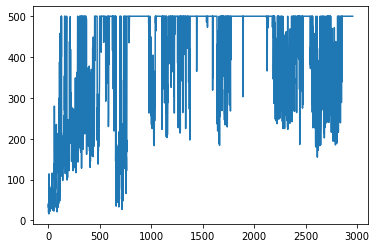

In [18]:
plt.plot(total_rewards)

The above behavior is because Policy Gradient is a stochastic Policy